In [93]:
import numpy as np
from scipy.io import loadmat
from scipy.fftpack import fft
from scipy.signal import welch
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
sns.set_style("whitegrid")


In [ ]:
# Funciones auxiliares para levantar data
def armarNombre(x):
    c = 'S' if x < 11 else 'P'
    x = (x-1)%10+1
    return str(c) + ("" if x == 10 else "0") + str(x)

def armarNombreArchivo(c, x):
    return "data/" + str(c) + ("" if x == 10 else "0") + str(x) + ".mat"

In [7]:
# Funcion auxiliar para pasar valores de frecuencia a bines
#    Delta < 4 Hz
#    4 Hz <= Theta < 8 Hz
#    8 Hz <= Alpha < 13 Hz
#    13 Hz <= Beta < 30 Hz
#    30 Hz <= Gamma < Nyquist

def nombre_banda(x):
    if x < 4:
        return 'Delta'
    elif x < 8:
        return 'Theta'
    elif x < 13:
        return 'Alpha'
    elif x < 30:
        return 'Beta'
    else:
        return 'Gamma'
    





def bin_de_frecuencia(x):
    if x < 4.:
        return 0
    elif x < 8.:
        return 1
    elif x < 13.:
        return 2
    elif x < 30.:
        return 3
    else:
        return 4
    
def agrupar_por_bines(potencias, frecuencias):
    res = np.zeros(5)
    for i in range(len(potencias)):
        res[bin_de_frecuencia(frecuencias[i])] += potencias[i]
    return res

In [4]:
pacientes_raw = {}
for f in os.listdir('./data'):
    fname = "./data/"+f 
    print(f[:-4] + ' -- cargado')
    pacientes_raw[f[:-4]] = (loadmat(fname)['data'])
    

P10 -- cargado
P05 -- cargado
P01 -- cargado
P02 -- cargado
S10 -- cargado
S02 -- cargado
P07 -- cargado
S01 -- cargado


In [6]:
welches = {}
acum_electrodo = np.array([0]*201)
normalizador = (lambda x : x/256)
vnormalizador = np.vectorize(normalizador)

for paciente in pacientes_raw:
    epochi = 0
    welches[paciente] = {}
    for epoch in pacientes_raw[paciente]:
        welches[paciente][epochi] = {}
        for electrodo in epoch:
            arr_electrodo = np.array(electrodo)
            acum_electrodo = np.sum([acum_electrodo,arr_electrodo],axis=0)
        acum_electrodo = vnormalizador(acum_electrodo)
        welches[paciente][epochi] = welch(acum_electrodo,fs= 201/1.54)
        epochi +=1
    print(paciente + ' Welcheado ')

/home/marto/.local/lib/python3.5/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


P01 1
P01 2
P01 3
P01 4
P01 5
P01 6
P01 7
P01 8
P01 9
P01 10
P01 11
P01 12
P01 13
P01 14
P01 15
P01 16
P01 17
P01 18
P01 19
P01 20
P01 21
P01 22
P01 23
P01 24
P01 25
P01 26
P01 27
P01 28
P01 29
P01 30
P01 31
P01 32
P01 33
P01 34
P01 35
P01 36
P01 37
P01 38
P01 39
P01 40
P01 41
P01 42
P01 43
P01 44
P01 45
P01 46
P01 47
P01 48
P01 49
P01 50
P01 51
P01 52
P01 53
P01 54
P01 55
P01 56
P01 57
P01 58
P01 59
P01 60
P01 61
P01 62
P01 63
P01 64
P01 65
P01 66
P01 67
P01 68
P01 69
P01 70
P01 71
P01 72
P01 73
P01 74
P01 75
P01 76
P01 77
P01 78
P01 79
P01 80
P01 81
P01 82
P01 83
P01 84
P01 85
P01 86
P01 87
P01 88
P01 89
P01 90
P01 91
P01 92
P01 93
P01 94
P01 95
P01 96
P01 97
P01 98
P01 99
P01 100
P01 101
P01 102
P01 103
P01 104
P01 105
P01 106
P01 107
P01 108
P01 109
P01 110
P01 111
P01 112
P01 113
P01 114
P01 115
P01 116
P01 117
P01 118
P01 119
P01 120
P01 121
P01 122
P01 123
P01 124
P01 125
P01 126
P01 127
P01 128
P01 129
P01 130
P01 131
P01 132
P01 133
P01 134
P01 135
P01 136
P01 137
P01 138
P01 

P05 171
P05 172
P05 173
P05 174
P05 175
P05 176
P05 177
P05 178
P05 179
P05 180
P05 181
P05 182
P05 183
P05 184
P05 185
P05 186
P05 187
P05 188
P05 189
P05 190
P05 191
P05 192
P05 193
P05 194
P05 195
P05 196
P05 197
P05 198
P05 199
P05 200
P05 201
P05 202
P05 203
P05 204
P05 205
P05 206
P05 207
P05 208
P05 209
P05 210
P05 211
P05 212
P05 213
P05 214
P05 215
P05 216
P05 217
P05 218
P05 219
P05 220
P05 221
P05 222
P05 223
P05 224
P05 225
P05 226
P05 227
P05 228
P05 229
P05 230
P05 231
P05 232
P05 233
P05 234
P05 235
P05 236
P05 237
P05 238
P05 239
P05 240
P05 241
P05 242
P05 243
P05 244
P05 245
P05 246
P05 247
P05 248
P05 249
P05 250
P05 251
P05 252
P05 253
P05 254
P05 255
P05 256
P05 257
P05 258
P05 259
P05 260
P05 261
P05 262
P05 263
P05 264
P05 265
P05 266
P05 267
P05 268
P05 269
P05 270
P05 271
P05 272
P05 273
P05 274
P05 275
P05 276
P05 277
P05 278
P05 279
P05 280
P05 281
P05 282
P05 283
P05 284
P05 285
P05 286
P05 287
P05 288
P05 289
P05 290
P05 291
P05 292
P05 293
P05 294
P05 295


P10 361
P10 362
P10 363
P10 364
P10 365
P10 366
P10 367
P10 368
P10 369
P10 370
P10 371
P10 372
P10 373
P10 374
P10 375
P10 376
P10 377
P10 378
P10 379
P10 380
P10 381
P10 382
P10 383
P10 384
P10 385
P10 386
P10 387
P10 388
P10 389
P10 390
P10 391
P10 392
P10 393
P10 394
P10 395
P10 396
P10 397
P10 398
P10 399
P10 400
P10 401
P10 402
P10 403
P10 404
P10 405
P10 406
P10 407
P10 408
P10 409
P10 410
P10 411
P10 412
P10 413
P10 414
P10 415
P10 416
P10 417
P10 418
P10 419
P10 420
P10 421
P10 422
P10 423
P10 424
P10 425
P10 426
P10 427
P10 428
P10 429
P10 430
P10 431
P10 432
P10 433
P10 434
P10 435
P10 436
P10 437
P10 438
P10 439
P10 440
P10 441
P10 442
P10 443
P10 444
P10 445
P10 446
P10 447
P10 448
P10 449
P10 450
P10 451
P10 452
P10 453
P10 454
P10 455
P10 456
P10 457
P10 458
P10 459
P10 460
P10 461
P10 462
P10 463
P10 464
P10 465
P10 466
P10 467
P10 468
P10 469
P10 470
P10 471
P10 472
P10 473
P10 474
P10 475
P10 476
P10 477
P10 478
P10 479
P10 480
P10 481
P10 482
P10 483
P10 484
P10 485


S10 478
S10 479
S10 480
S10 481
S10 482
S10 483
S10 484
S10 485
S10 486
S10 487
S10 488
S10 489
S10 490
S10 491
S10 492
S10 493
S10 494
S10 495
S10 496
S10 497
S10 498
S10 499
S10 500
S10 501
S10 502
S10 503
S10 504
S10 505
S10 506
S10 507
S10 508
S10 509
S10 510
S10 511
S10 512
S10 513
S10 514
S10 515
S10 516
S10 517
S10 518
S10 519
S10 520
S10 521
S10 522
S10 523
S10 524
S10 525
S10 526
S10 527
S10 528
S10 529
S10 530
S10 531
S10 532
S10 533
S10 534
S10 535
S10 536
S10 537
S10 538
S10 539
S10 540
S10 541
S10 542
S10 543
S10 544
S10 545
S10 546
S10 547
S10 548
S10 549
S10 550
S10 551
S10 552
S10 553
S10 554
S10 555
S10 556
S10 557
S10 558
S10 559
S10 560
S10 561
S10 562
S10 563
S10 564
S10 565
S10 566
S10 567
S10 568
S10 569
S10 570
S10 571
S10 572
S10 573
S10 574
S10 575
S10 576
S10 577
S10 578
S10 579
S10 580
S10 581
S10 582
S10 583
S10 584
S10 585
S10 586
S10 587
S10 588
S10 589
S10 590
S10 591
S10 592
S10 593
S10 594
S10 595
S10 596
S10 597
S10 598
S10 599
S10 600
S10 601
S10 602


P07 112
P07 113
P07 114
P07 115
P07 116
P07 117
P07 118
P07 119
P07 120
P07 121
P07 122
P07 123
P07 124
P07 125
P07 126
P07 127
P07 128
P07 129
P07 130
P07 131
P07 132
P07 133
P07 134
P07 135
P07 136
P07 137
P07 138
P07 139
P07 140
P07 141
P07 142
P07 143
P07 144
P07 145
P07 146
P07 147
P07 148
P07 149
P07 150
P07 151
P07 152
P07 153
P07 154
P07 155
P07 156
P07 157
P07 158
P07 159
P07 160
P07 161
P07 162
P07 163
P07 164
P07 165
P07 166
P07 167
P07 168
P07 169
P07 170
P07 171
P07 172
P07 173
P07 174
P07 175
P07 176
P07 177
P07 178
P07 179
P07 180
P07 181
P07 182
P07 183
P07 184
P07 185
P07 186
P07 187
P07 188
P07 189
P07 190
P07 191
P07 192
P07 193
P07 194
P07 195
P07 196
P07 197
P07 198
P07 199
P07 200
P07 201
P07 202
P07 203
P07 204
P07 205
P07 206
P07 207
P07 208
P07 209
P07 210
P07 211
P07 212
P07 213
P07 214
P07 215
P07 216
P07 217
P07 218
P07 219
P07 220
P07 221
P07 222
P07 223
P07 224
P07 225
P07 226
P07 227
P07 228
P07 229
P07 230
P07 231
P07 232
P07 233
P07 234
P07 235
P07 236


S02 205
S02 206
S02 207
S02 208
S02 209
S02 210
S02 211
S02 212
S02 213
S02 214
S02 215
S02 216
S02 217
S02 218
S02 219
S02 220
S02 221
S02 222
S02 223
S02 224
S02 225
S02 226
S02 227
S02 228
S02 229
S02 230
S02 231
S02 232
S02 233
S02 234
S02 235
S02 236
S02 237
S02 238
S02 239
S02 240
S02 241
S02 242
S02 243
S02 244
S02 245
S02 246
S02 247
S02 248
S02 249
S02 250
S02 251
S02 252
S02 253
S02 254
S02 255
S02 256
S02 257
S02 258
S02 259
S02 260
S02 261
S02 262
S02 263
S02 264
S02 265
S02 266
S02 267
S02 268
S02 269
S02 270
S02 271
S02 272
S02 273
S02 274
S02 275
S02 276
S02 277
S02 278
S02 279
S02 280
S02 281
S02 282
S02 283
S02 284
S02 285
S02 286
S02 287
S02 288
S02 289
S02 290
S02 291
S02 292
S02 293
S02 294
S02 295
S02 296
S02 297
S02 298
S02 299
S02 300
S02 301
S02 302
S02 303
S02 304
S02 305
S02 306
S02 307
S02 308
S02 309
S02 310
S02 311
S02 312
S02 313
S02 314
S02 315
S02 316
S02 317
S02 318
S02 319
S02 320
S02 321
S02 322
S02 323
S02 324
S02 325
S02 326
S02 327
S02 328
S02 329


In [ ]:


data = [[][]]
for paciente in welches:
    if paciente.startswirh('P'):
        label = 0
    else:
        label = 1
    for epoch in paciente:
        data[0].append()
        

In [65]:
bandas = {0:{},1:{}}
for paciente_k, paciente_v in welches.items():
    if paciente_k.startswith('P'):
        label = 0
    else:
        label = 1
    for epoch_k,epoch_v in paciente_v.items():
        for i in range(len(epoch_v[0])):
            try:
                bandas[label][nombre_banda(epoch_v[0][i])].append(epoch_v[1][i])
            except KeyError:
                bandas[label][nombre_banda(epoch_v[0][i])] = [epoch_v[1][i]]

# plt.clf()
# plt.plot(welches['P01'][1][0],welches['P01'][1][1])
# plt.show()
#print(nombre_banda(welches['P01'][1][0][9]))

dict_keys(['Delta', 'Beta', 'Gamma', 'Theta', 'Alpha'])


In [87]:
x = []
y = []
for k,l in bandas.items():
    for v in l['Delta']: 
            x.append(v)
            y.append(k)


1


21515
21515
21514
21514


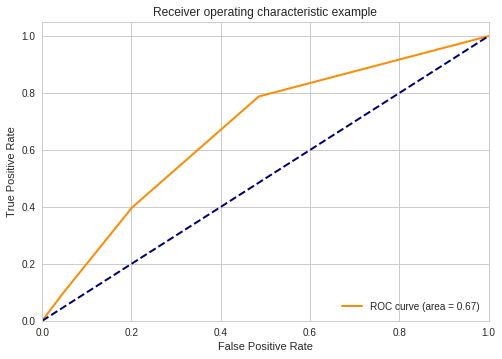

In [201]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5,random_state=0)

print(len(X_test))
print(len(y_test))


print(len(X_train))
print(len(y_train))

X_train = np.array(X_train)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0],-1)

# print(X_test)

import random
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 



y_score = neigh.predict_proba(X_test)
y_score = y_score[:,[1]].flatten()
fpr,tpr,thresholds = roc_curve(y_test,y_score) 
roc_auc =  auc(fpr, tpr)
lw =2

plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

